In [18]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import numpy as np
from pandas.io.json import json_normalize
import collections
from collections import defaultdict
import itertools
from operator import itemgetter

([<matplotlib.axis.XTick at 0x1af084dd748>,
 <a list of 6 Text xticklabel objects>)

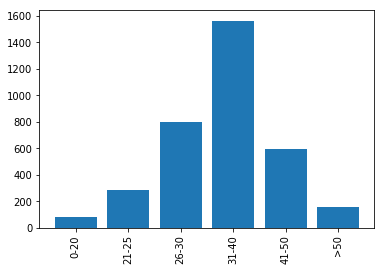

In [55]:
#Q1
df=pd.read_json('q1.json')
df=df.dropna()
plt.bar(range(6), df['total']);
plt.xticks(range(6), list(df['_id']), rotation='vertical')


([<matplotlib.axis.XTick at 0x1af07d68d30>,
 <a list of 6 Text xticklabel objects>)

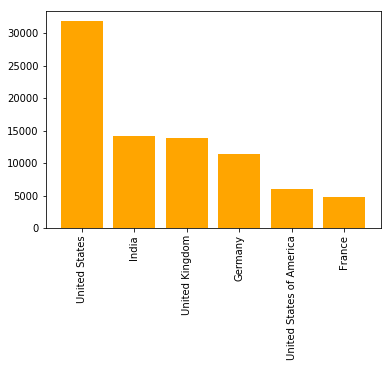

In [63]:
#Q2
df=pd.read_json('q2.json')
df=df.dropna()
df=df.sort_values(by='total', ascending=False)
plt.bar(range(6), df['total'], color='orange');
plt.xticks(range(6), list(df['_id']), rotation='vertical')



In [19]:
#Q3

def count_language_from_survey(survey_path, result_path):
    df2011=pd.read_json(survey_path)
    splitlista=[]
    [splitlista.append(e) for i in df2011['programming_languages'] for  e in i]
    minuscula=[]
    [minuscula.append(i.lower()) for i in splitlista]
    lista = [row.split(',') for row in minuscula]
    conteo=[[str(key), len(list(group))] for key, group in itertools.groupby(sorted(lista, key=itemgetter(0)), itemgetter(0))]
    conteo.sort(key=lambda x: x[-1])
    conteo= conteo[-5:][::-1]
    result=[]
    for language in conteo:
        result.append({language[0]: language[1]})
        

    with open(result_path, 'w') as outfile:
        json.dump(result, outfile, indent=4)
        
    return result
        
results = count_language_from_survey('clean_files/2011.json', 'results_2011.json')

dataframe = {}

for result in results:
    for (key, value) in result.items():
        data = {key: [value]}
        dataframe.update(**data)

df11=pd.DataFrame(dataframe)
df11.head()


ImportError: matplotlib is required for plotting.

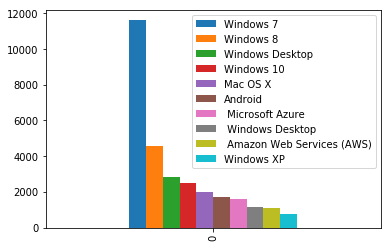

In [100]:
#Q4
df=pd.read_json('clean_files/data.json')
df1=df[['os','programming_languages']]
df2=df1[df1['programming_languages'].str.contains('C#', regex=False, na=False)]
df2['os'].dropna()
splitlista=[]
for os_list in df2['os']:
    if os_list is None:
        continue
    for os in os_list:
        splitlista.append(os)
cuenta = collections.Counter(splitlista)
os_total = cuenta.most_common(10)

os_list = {}
for os in os_total:
    os_list[os[0]]=[os[1]]

df=pd.DataFrame(os_list)


df.plot(kind='bar')




In [ ]:
#Q5


In [ ]:
#Q6


In [103]:
#Q7
df=pd.read_json('q7.json')

df

,javascript,php,sql,c#,javascript
0,NaN,NaN,1408.0,NaN,NaN
1,1238.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,854.0,NaN
3,NaN,NaN,NaN,NaN,684.0
4,NaN,684.0,NaN,NaN,NaN
